# Julia 機器學習：Clustering 分群模型

## 作業 028：資料分群

從提供的檔案中讀取資料，利用分群模型將資料分群後並將資料視覺化。資料中有 15 群，並利用 k-means 去對資料做分群。資料取自 http://cs.uef.fi/sipu/datasets/

In [1]:
using Pkg

In [2]:
Pkg.add("Clustering")

    Updating registry at `C:\Users\evanl\.julia\registries\General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
    Updating `C:\Users\evanl\.julia\environments\v1.6\Project.toml`
  [aaaa29a8] + Clustering v0.14.2
  No Changes to `C:\Users\evanl\.julia\environments\v1.6\Manifest.toml`


In [21]:
Pkg.add("CSV")

   Resolving package versions...
  No Changes to `C:\Users\evanl\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\evanl\.julia\environments\v1.6\Manifest.toml`


In [22]:
using Clustering, CSV, DataFrames

## 讀取資料

In [26]:
data = CSV.read("s1-set.csv",DataFrame)
first(data,10)

10×2 DataFrame
 Row │ x       y      
     │ Int64   Int64  
─────┼────────────────
   1 │ 664159  550946
   2 │ 665845  557965
   3 │ 597173  575538
   4 │ 618600  551446
   5 │ 635690  608046
   6 │ 588100  557588
   7 │ 582015  546191
   8 │ 604678  574577
   9 │ 572029  518313
  10 │ 604737  574591

In [27]:
X = Matrix(data)'

2×5000 adjoint(::Matrix{Int64}) with eltype Int64:
 664159  665845  597173  618600  635690  …  691827  650661  599647  684091
 550946  557965  575538  551446  608046     863963  861267  858702  842566

In [28]:
k = 15
result = kmeans(X,k)

KmeansResult{Matrix{Float64}, Float64, Int64}([244654.88563049852 844029.8364779875 … 356978.24210526317 337565.118902439; 847642.0410557184 631610.4512578617 … 130589.97894736842 562157.1768292683], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5  …  11, 11, 11, 11, 11, 11, 11, 11, 11, 11], [3.868603093541992e9, 3.784863740838379e9, 8.956930531298828e7, 6.740235058618164e8, 1.976029744717041e9, 6.258253758146973e8, 1.402054662494873e9, 3.6132858852539062e6, 4.345366158831543e9, 3.3965333364257812e6  …  2.818333299736328e8, 5.894317032715332e9, 2.948263640739258e9, 2.094690922705078e7, 5.5591316869765625e9, 1.75454214078125e8, 2.2580043328320312e8, 7.600214612407227e8, 6.145172446421875e9, 2.748227945390625e8], [341, 636, 346, 346, 297, 334, 351, 327, 250, 325, 375, 335, 314, 95, 328], [341, 636, 346, 346, 297, 334, 351, 327, 250, 325, 375, 335, 314, 95, 328], 1.428925994351682e13, 9, true)

In [29]:
data[!, :cluster] = string.(assignments(result));

In [30]:
using Gadfly

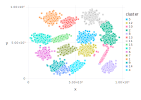

In [31]:
plot(data,x = "x",y = "y",color = "cluster",Geom.point)